<a href="https://colab.research.google.com/github/indyfree/tailor/blob/master/notebooks/01-exploration-tailorit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tailorit - Data Exploration

### Import required packages

In [0]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tailor
from tailor.data import group_by

### Load data

In [0]:
# This is a test
df = tailor.load_data()


### Get an overview over the dataset

In [0]:
df.head(20)

,article_id,time_on_sale,original_price,discount,markdown,sells_price,stock_total,avq,article_count,revenue,brand,color,Abteilung,WHG,WUG,month,season
0,900001,0,59.95,0.64,0.0,59.31,1499,0.72,22,1304.90,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
1,900001,1,59.95,0.14,0.0,59.81,1499,3.10,39,2332.61,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
2,900001,2,59.95,0.84,0.0,59.11,1499,5.30,32,1891.40,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
3,900001,3,59.95,0.81,0.0,59.14,1499,7.20,27,1596.69,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
4,900001,4,59.95,0.35,0.0,59.60,1499,9.34,34,2026.30,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
5,900001,5,59.95,0.89,0.0,59.06,1499,11.67,27,1594.66,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
6,900001,6,59.95,0.34,0.0,59.61,1499,14.45,53,3159.35,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
7,900001,7,59.95,0.96,0.0,58.99,1499,16.86,33,1946.54,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
8,900001,8,59.95,0.04,0.0,59.91,1499,19.16,35,2096.92,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring
9,900001,9,59.95,-11.19,12.0,59.14,1499,21.77,37,2188.15,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring


In [0]:
pd.options.display.float_format = "{:.2f}".format
df.describe(include=np.number)

,time_on_sale,original_price,discount,markdown,sells_price,stock_total,avq,article_count,revenue
count,226408.00,226408.00,226408.00,226408.00,226408.00,226408.00,226408.00,226408.00,226408.00
mean,12.50,50.52,2.75,4.73,43.05,1893.77,28.78,42.57,1585.38
std,7.50,24.63,5.18,9.33,22.37,1893.05,23.85,55.23,1948.76
min,0.00,0.00,-30.00,-10.00,0.00,0.00,0.00,0.00,0.00
25%,6.00,34.95,0.15,0.00,28.48,684.00,7.56,9.00,391.48
50%,12.50,49.95,0.80,0.00,39.95,1412.00,24.24,23.00,938.83
75%,19.00,64.95,3.00,9.00,58.45,2688.00,45.44,55.00,2033.73
max,25.00,179.95,81.98,90.00,179.95,36396.00,100.12,1093.00,38577.86


In [0]:
df.describe(include=['category'])

,article_id,brand,color,Abteilung,WHG,WUG,month,season
count,226408,226408,226408,226408,226408,226408,226408,226408
unique,8708,75,40,7,43,152,12,4
top,908708,Friagabis,schwarz,Abteilung002,WHG015,WUG020,March,Winter
freq,26,15392,48308,100672,24752,9958,37648,61750


### Check for null values

In [0]:
df.isna().values.any()

False

Wow, we're in luck, there are no null values in the dataset!

### Plot sample article

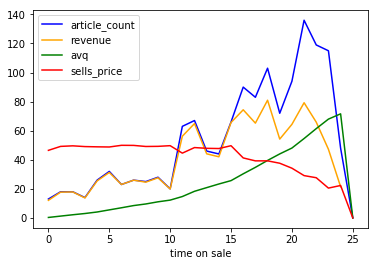

In [0]:
sample_id = df.sample().article_id.values
article = df.loc[df.article_id == sample_id]
plt.plot(article.time_on_sale, article.article_count, 'blue')
plt.plot(article.time_on_sale, article.revenue/article.original_price, 'orange', label='revenue')
plt.plot(article.time_on_sale, article.avq, 'green')
plt.plot(article.time_on_sale, article.sells_price, 'red')
plt.xlabel('time on sale')
plt.legend();

We can see the clear relationship between the amount of articles sold, it's sells price (including markdown and discounts) and the generated revenue here.